# WALMART SALES PREDICTION
##### *BY: SIDDHARTH CHANDEL*

---

#### Necessory libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

#### Importing the data

In [2]:
walmart_sales = pd.read_csv("dataset\Walmart_Sales.csv")
walmart_sales

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


#### Data Preprocessing

In [3]:
walmart_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
walmart_sales.Date = pd.to_datetime(walmart_sales.Date)
walmart_sales['Year'] = walmart_sales['Date'].dt.year
walmart_sales['Month'] = walmart_sales['Date'].dt.month
walmart_sales['day'] = walmart_sales['Date'].dt.day
walmart_sales.drop(columns=['Date'], inplace=True)
walmart_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   Year          6435 non-null   int64  
 8   Month         6435 non-null   int64  
 9   day           6435 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 502.9 KB


C:\Users\siddh\AppData\Local\Temp\ipykernel_17620\1891394531.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  walmart_sales.Date = pd.to_datetime(walmart_sales.Date)


In [5]:
walmart_sales.isna().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Year            0
Month           0
day             0
dtype: int64

In [6]:
walmart_sales.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,day
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,2010.965035,6.475524,15.650350
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,0.797019,3.321797,8.753908
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,2010.000000,1.000000,1.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,2010.000000,4.000000,8.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,2011.000000,6.000000,16.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,2012.000000,9.000000,23.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,2012.000000,12.000000,31.000000


#### Weekly Sales Per Store

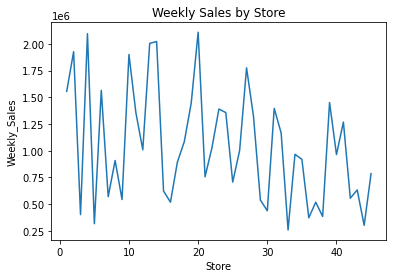

In [7]:
store_sales = walmart_sales.groupby(['Store']).mean()
sns.lineplot(x = store_sales.index, y = store_sales['Weekly_Sales'])
plt.title('Weekly Sales by Store')
plt.show()

#### Co-relation Matrix

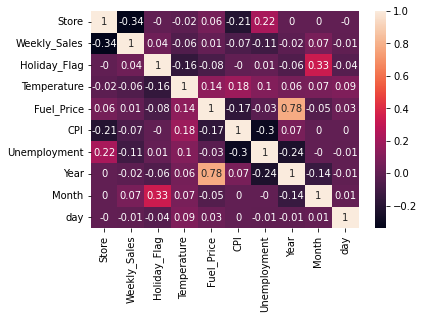

In [8]:
sns.heatmap(walmart_sales.corr().apply(lambda x: round(x,2)), annot=True, fmt='g')
plt.show()

#### Splitting Of Data Into Training And Testing

In [9]:
y = walmart_sales.Weekly_Sales
x = walmart_sales.drop(columns=['Weekly_Sales'])
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Standardize features for SVR and KNN (optional for others, but good practice)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### ML Models Creation And Training

In [10]:
# Dictionary to store RMSE for each model
rmse_results = {}

In [11]:
# 1. Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
rmse_results['Linear Regression'] = np.sqrt(mean_squared_error(y_test, y_pred_linear))

In [12]:
# 2. Polynomial Regression (degree=2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)
rmse_results['Polynomial Regression (degree=2)'] = np.sqrt(mean_squared_error(y_test, y_pred_poly))

In [13]:
# 3. Support Vector Regression (SVR)
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)
rmse_results['SVM'] = np.sqrt(mean_squared_error(y_test, y_pred_svr))

In [14]:
# 4. K-Nearest Neighbors Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)
rmse_results['KNN Regressor'] = np.sqrt(mean_squared_error(y_test, y_pred_knn))

In [15]:
# 5. Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rmse_results['Random Forest Regressor'] = np.sqrt(mean_squared_error(y_test, y_pred_rf))

#### RMSE Score Results

In [16]:
rmse_results

{'Linear Regression': 522417.69595778873,
 'Polynomial Regression (degree=2)': 473422.6335121586,
 'SVM': 575594.0601755715,
 'KNN Regressor': 476624.518171879,
 'Random Forest Regressor': 125895.53961032447}

#### Plot Function

In [17]:
def plot_predictions(y_test, y_pred, model_name, ax:plt.Axes):
    plt.figure(figsize=(8, 3))
    ax.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.6)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    ax.set_xlabel("Actual Values", {'fontsize':16})
    ax.set_ylabel("Predicted Values", {'fontsize':16})
    ax.set_title(f"{model_name}", {"size":20})

In [18]:
y_pred = [y_pred_linear, y_pred_knn, y_pred_poly, y_pred_rf, y_pred_svr]
models = "LinearRegression, KNN, PolynomialRegression, RandomForest, SVM".split(", ")

#### Predictions Of Different Models vs Actual Values

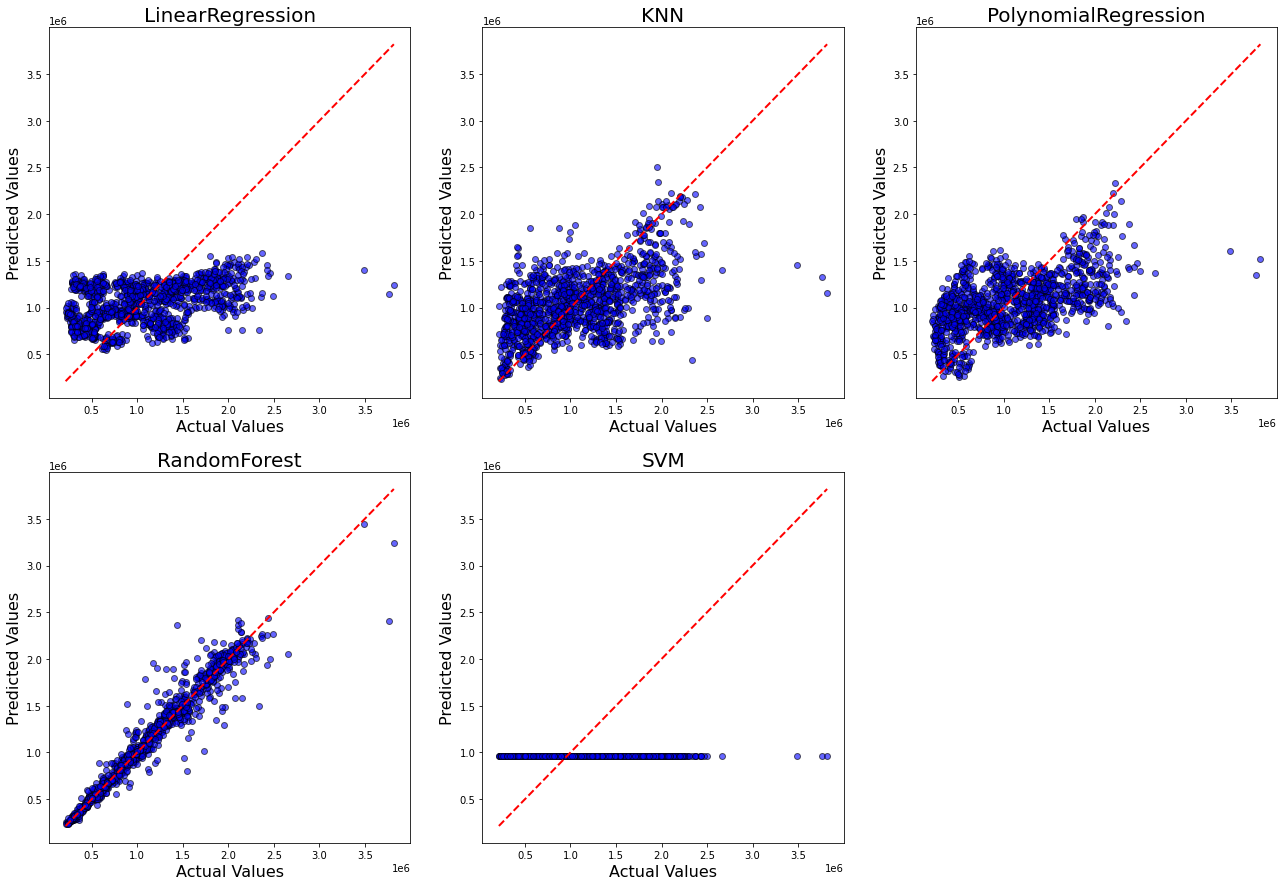

<Figure size 576x216 with 0 Axes>

<Figure size 576x216 with 0 Axes>

<Figure size 576x216 with 0 Axes>

<Figure size 576x216 with 0 Axes>

<Figure size 576x216 with 0 Axes>

In [19]:
fig, axs = plt.subplots(2,3, figsize=(22, 15))
r,c = 0,0
for i in range(5):
    plot_predictions(y_test, y_pred[i], models[i], axs[r][c])
    c+=1
    if c>2:
        r+=1
        if r>1:
            break
        c=0
axs[r][c].remove()
plt.show()

#### RMSE Scores Comparison

In [20]:
rmse_results = {key:value for key, value in sorted(rmse_results.items(), key = lambda x:x[1])}

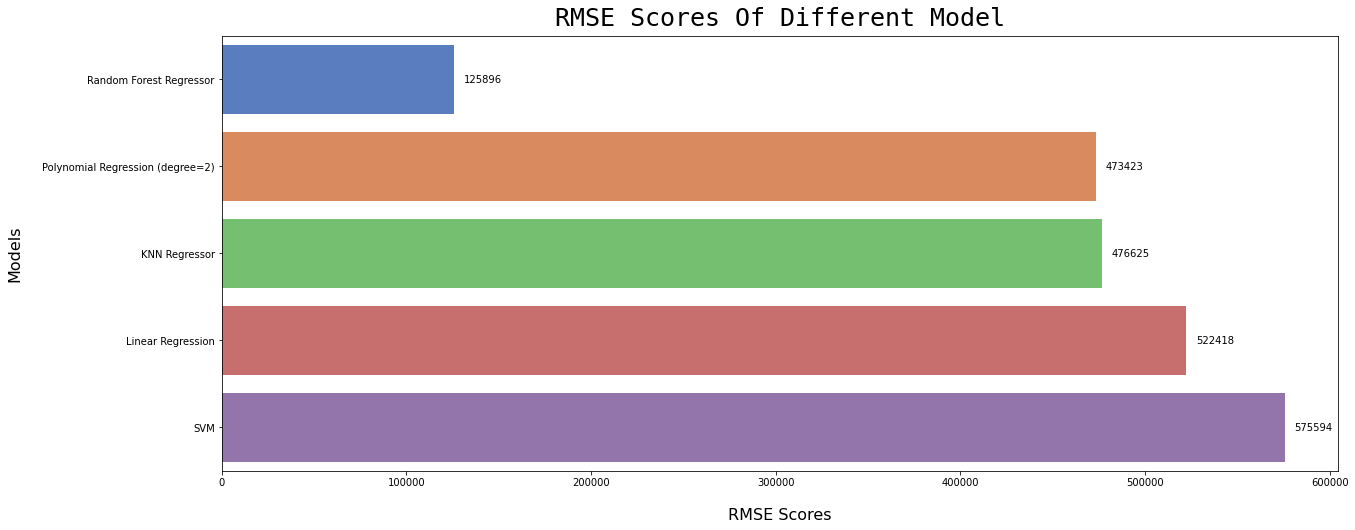

In [21]:
plt.figure(figsize=(20, 8))
ax = sns.barplot(y=list(rmse_results.keys()), x=list(rmse_results.values()), palette="muted", orient='h')
ax.bar_label(ax.containers[0], fontsize=10, padding=10, label_type="edge", fmt="%g")
plt.ylabel("Models", {"size": 16},labelpad=20)
plt.xlabel("RMSE Scores", {"size": 16},labelpad=20)
plt.title("RMSE Scores Of Different Model",fontdict={'size':25, "fontname":"monospace"}, pad=10)
plt.show()

In [23]:
!jupyter nbconvert --to html report.ipynb

[NbConvertApp] Converting notebook report.ipynb to html
[NbConvertApp] Writing 1010935 bytes to report.html
